In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

#Seeds

Measurements of geometrical properties of kernels belonging to three different varieties of wheat. A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes.

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.


Набор содержит геометрические свойства зёрен, принадлежащих к трем разным сортам пшеницы. Рентгеновский микроскоп и пакет GRAINS были использованы для измерения каждого из семи вещественных аттрибутов.

Исследуемая группа состоит из зерен принадлежащих трем разным сортам пшеницы: Кама, Роза и Канадская, 70 элементов каждой, случайно выбранных для эксперимента. Высококачественная визуализация внутренненей структуры зерна выявлена с использованием рентгеновского микроскопа. Это не оставляет повреждений и значительно дешевле, чем другие более сложные методы создания изображения, как сканирующий микроскоп или лазерная технология. Изображения созданы на 13х18 см рентгеновских KODAK пластинах. Исследование проведено используя собранную комбайном пшеницу, выросшую на экспериментальных полях, изучаемых в Институте Агрофизики Польской Академии Наук в Люблине.

Для составления данных, семь геометрических параметров зёрен пшеницы были измерены:
1. Площадь
2. Периметр
3. Компактность (4pi*A/P^2)
4. Длина зерна
5. Ширина зерна
6. Коэффициент асимметрии
7. Длина канавки зерна

Все перечисленные параметры - вещественные

#Импорт данных, проверка читаемости

In [3]:
data_raw = pd.read_excel('clustering datasets/seeds.xlsx')
data_raw.head(3)

,area,perimeter,compactness,length,width,asymmetry coefficient,groove,true
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1


In [4]:
data_raw.tail(3)

,area,perimeter,compactness,length,width,asymmetry coefficient,groove,true
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3


т.к. стоит задача кластеризации, то истинный класс объекта - неизвестен. Следовательно, необходимо удалить поле истинного класса объекта

In [6]:
data_raw = data_raw.drop(columns='true',axis=1)

Необходимо подписать столбцы.

In [7]:
#Есть только численные величины, категориальных - нет
numerical_names =['Area', 'Perimeter', 'Compact', 'Length', 'Width', 'Asymm', 'LG']

data_raw.columns=numerical_names
data_raw.head(3)

,Area,Perimeter,Compact,Length,Width,Asymm,LG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825


#Визуализация. Описательная статистика

In [8]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       210 non-null    float64
 1   Perimeter  210 non-null    float64
 2   Compact    210 non-null    float64
 3   Length     210 non-null    float64
 4   Width      210 non-null    float64
 5   Asymm      210 non-null    float64
 6   LG         210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [29]:
for col in data_raw.columns:
  missing_value_counts = data_raw[col].isna().sum()
  percentage = data_raw[col].isna().sum()/len(data_raw[col])*100
  print("Столбец",col,"содержит",missing_value_counts,
        "пропусков (%.2f %%)."%percentage)

Столбец Area содержит 0 пропусков (0.00 %).
Столбец Perimeter содержит 0 пропусков (0.00 %).
Столбец Compact содержит 0 пропусков (0.00 %).
Столбец Length содержит 0 пропусков (0.00 %).
Столбец Width содержит 0 пропусков (0.00 %).
Столбец Asymm содержит 0 пропусков (0.00 %).
Столбец LG содержит 0 пропусков (0.00 %).


In [30]:
data_raw[numerical_names].describe()

,Area,Perimeter,Compact,Length,Width,Asymm,LG
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


# Выводы:


* Пропусков в данных нет.
* Среднее не совпадает с медианой - распределение не соответствует нормальному.
* Диапазоны значений нужно показать предметным экспертам для анализа корректности.

# Визуальный анализ распределения и разброса данных

## Box plot, bar plot

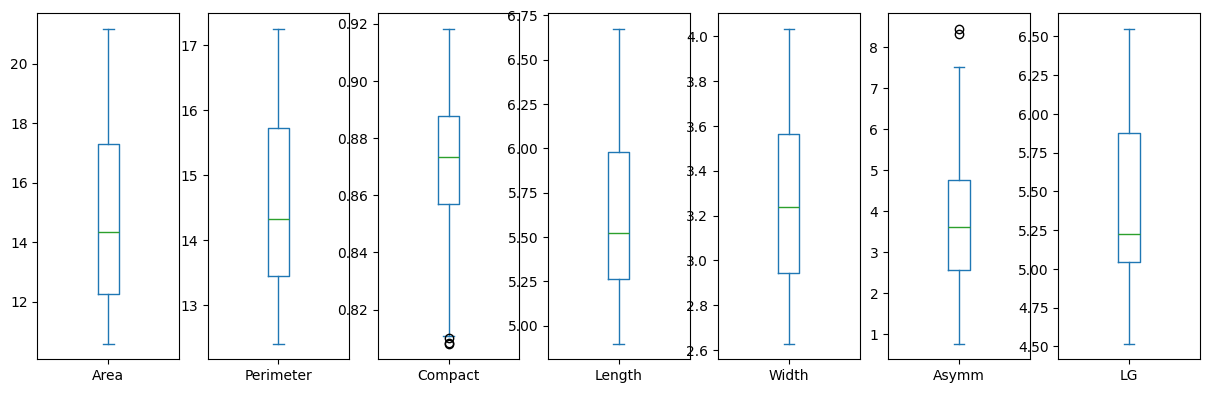

In [31]:
data_raw.plot(kind='box',subplots=True,figsize=(15,4.5))
plt.show()

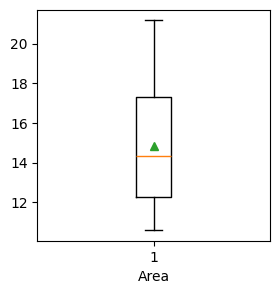

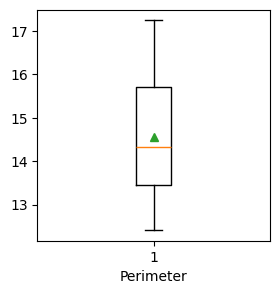

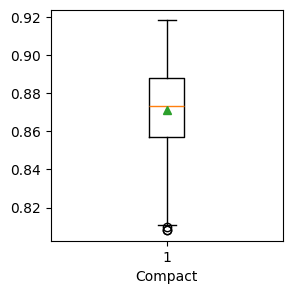

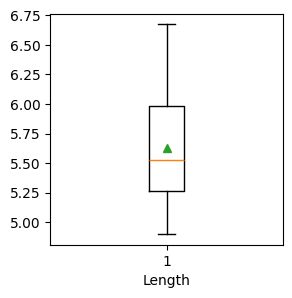

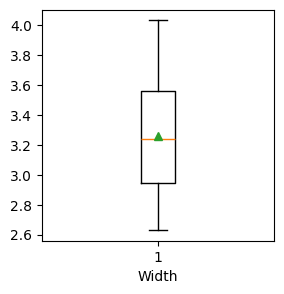

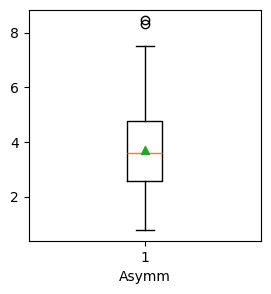

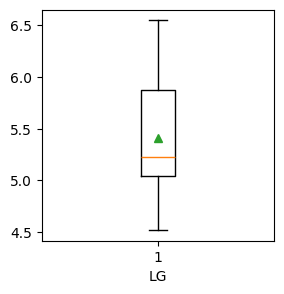

In [12]:
#box plot каждого параметра
for col in data_raw.columns:
  fig, ax = plt.subplots(figsize=(3,3))
  # нужно использовать только непустые данные
  ax.boxplot(data_raw[col],
             showmeans=True)
  ax.set_xlabel(col)
  plt.show()

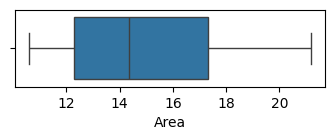

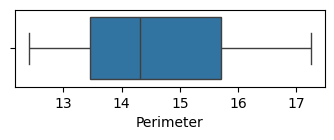

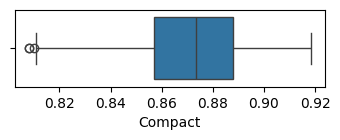

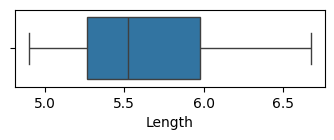

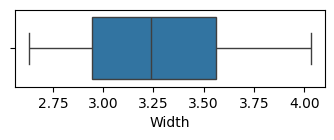

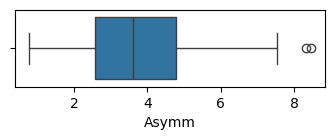

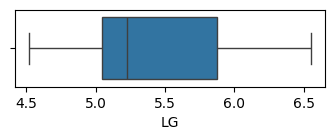

In [13]:
for col in data_raw.columns:
  fig, ax = plt.subplots(figsize=(4,1))
  sns.boxplot(data=data_raw, x=col, ax=ax)
  plt.show()

## Гистограммы с оценкой плотности распределения

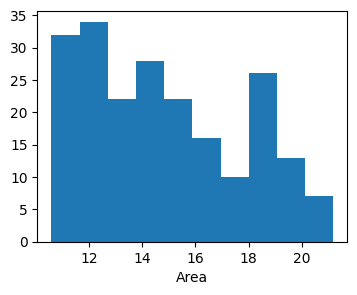

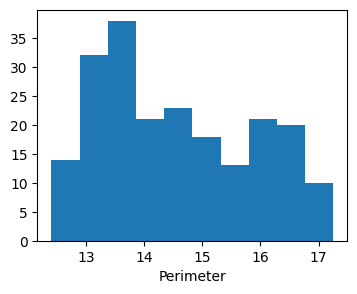

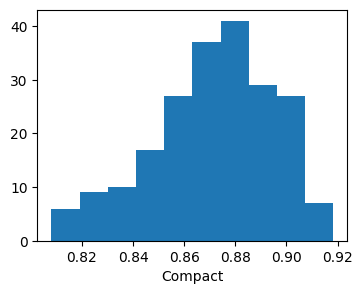

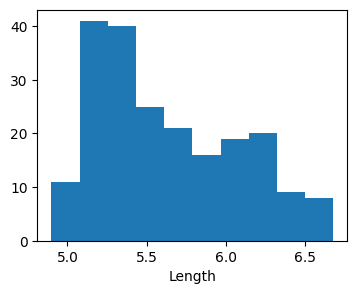

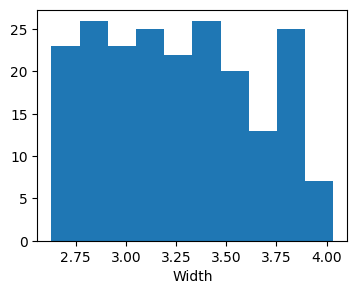

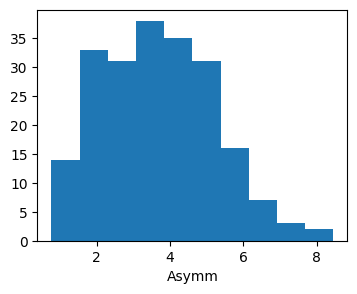

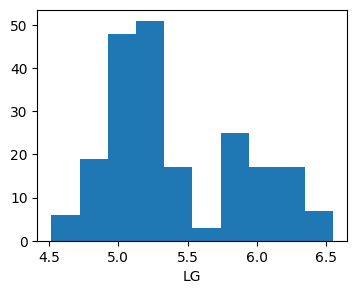

In [14]:
for col in data_raw.columns:
  fig, ax = plt.subplots(figsize=(4,3))
  ax.hist(data_raw[col])
  ax.set_xlabel(col)
  plt.show()

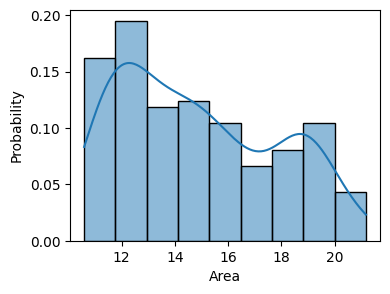

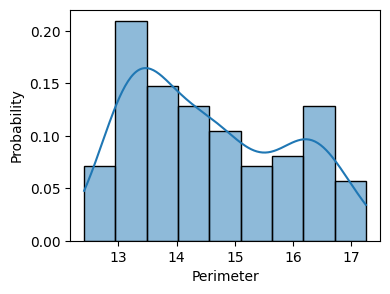

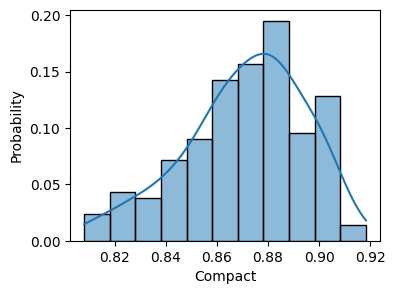

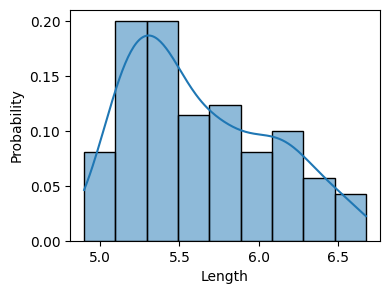

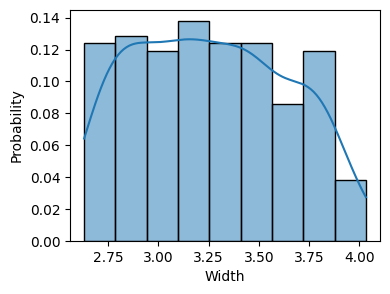

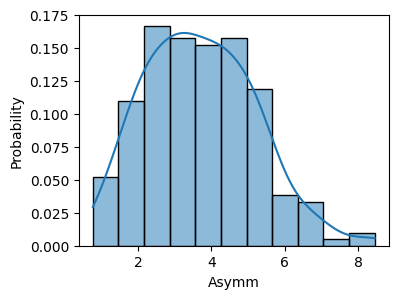

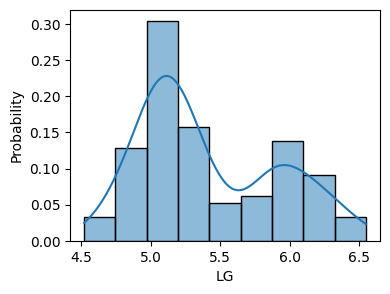

In [15]:
for col in data_raw.columns:
  fig, ax = plt.subplots(figsize=(4,3))
  sns.histplot(data=data_raw, x=col,
               kde=True,
               stat='probability')
  plt.show()

##Выводы:

* Параметры не имеют дискретных значений
* Переменные не распределены нормально

# Проверка корреляции

## Парные графики

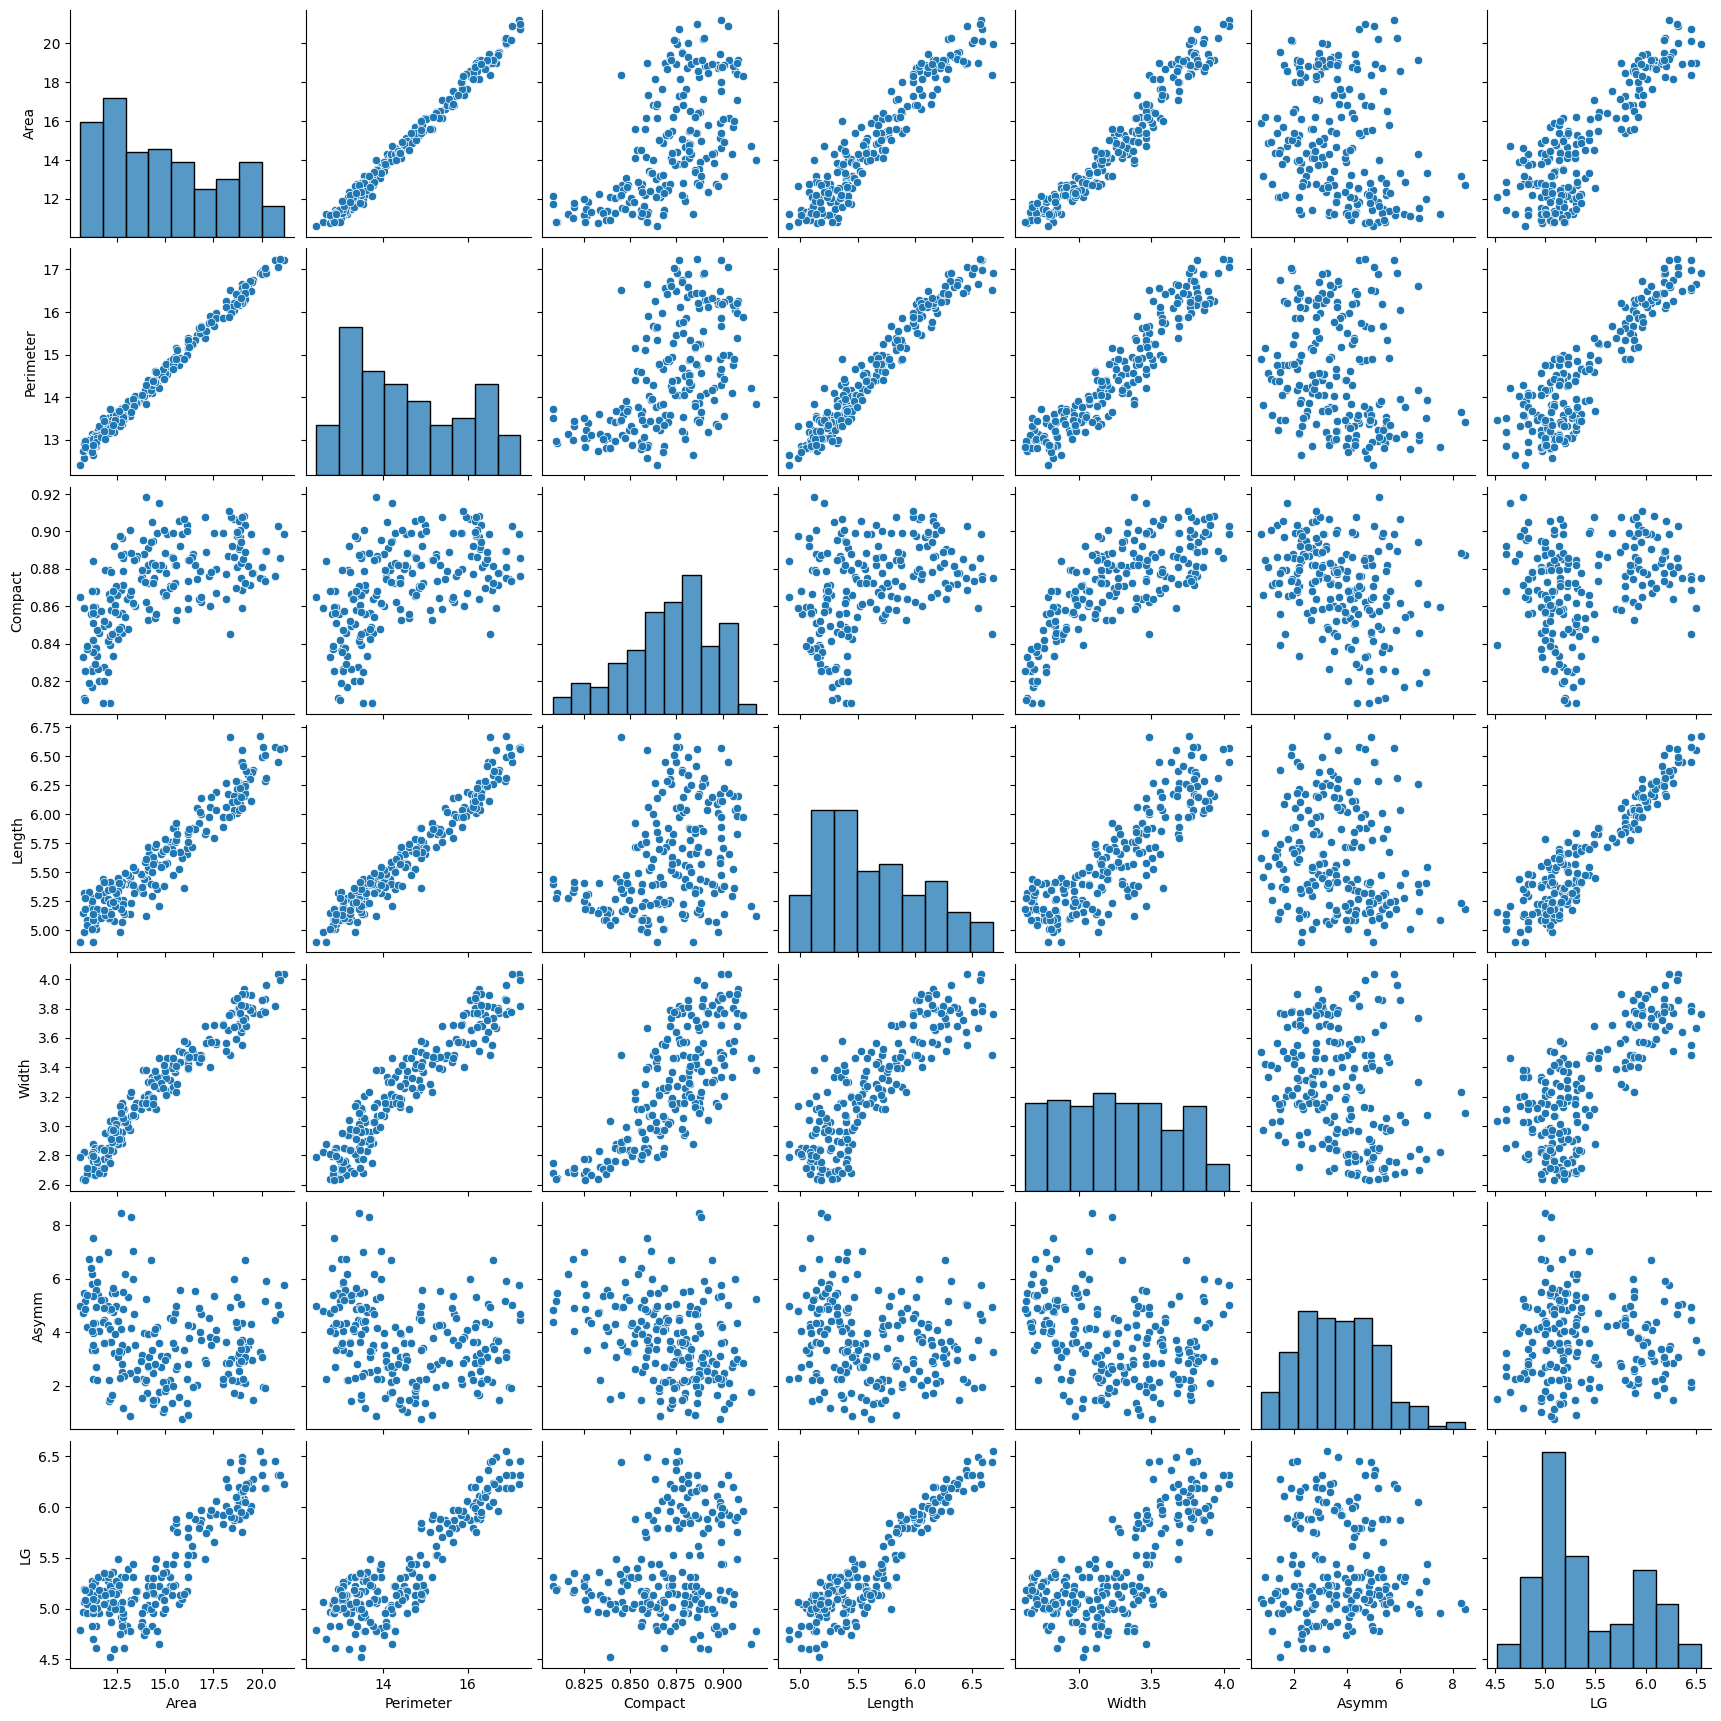

In [16]:
sns.pairplot(data = data_raw, kind='scatter')
plt.show()

## Корреляции

Корреляционная матрица

In [17]:
data_raw.corr()

,Area,Perimeter,Compact,Length,Width,Asymm,LG
Area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
Perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
Compact,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
Length,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
Width,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
Asymm,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
LG,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


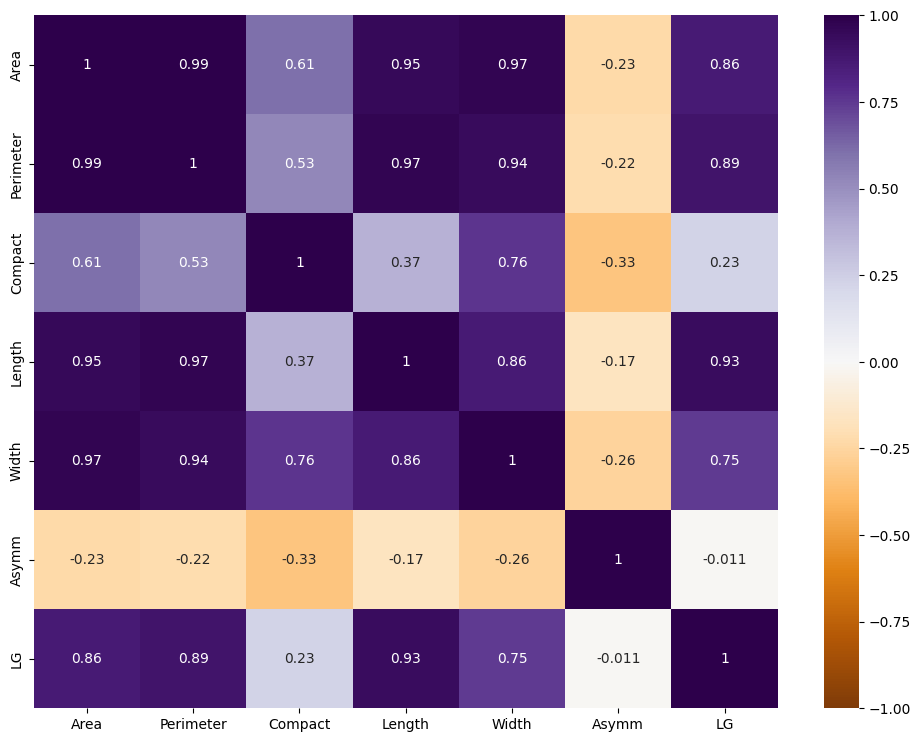

In [18]:
_, ax = plt.subplots(figsize=(12,9))
sns.heatmap(data=data_raw.corr(),
            annot=True,vmin=-1,vmax=1,
            cmap='PuOr')
plt.show()

Изучим "сильные" и "средние" корреляции

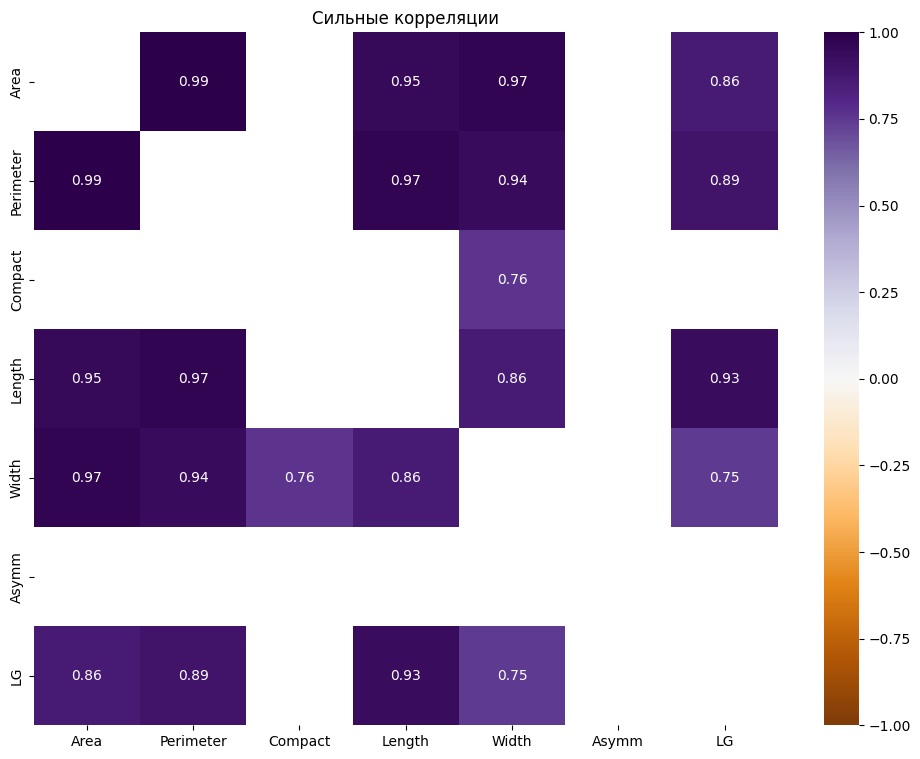

In [ ]:
_, ax = plt.subplots(figsize=(12,9))
#установим массив условий отображения для определения сильной корреляции
sns.heatmap(data=data_raw.corr()[ (data_raw.corr() > 0.65) &
                       (data_raw.corr() < 1) |
                       (data_raw.corr() < -0.65) &
                       (data_raw.corr() > -1) ],
            annot=True, vmin=-1,vmax=1,
            cmap='PuOr')
ax.set_title('Сильные корреляции')
plt.show()

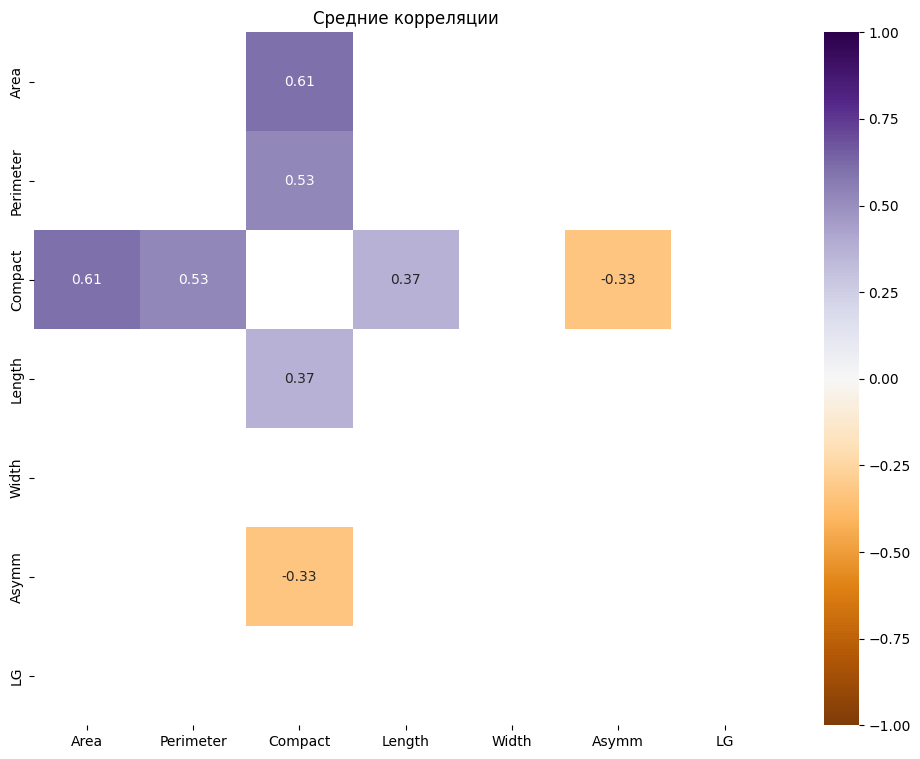

In [20]:
_, ax = plt.subplots(figsize=(12,9))
sns.heatmap(data=data_raw.corr()[ (data_raw.corr() > 0.3) &
                       (data_raw.corr() <= 0.65 ) |
                       (data_raw.corr() >= -0.65) &
                       (data_raw.corr() < -0.3) ],
            annot=True, vmin=-1,vmax=1,
            cmap='PuOr')
ax.set_title('Средние корреляции')
plt.show()

# Кластеризация

In [33]:
X = StandardScaler().fit_transform(data_raw)

In [34]:
sp = SpectralClustering(n_clusters=3,
                        assign_labels='kmeans',
                        random_state=0).fit(X)

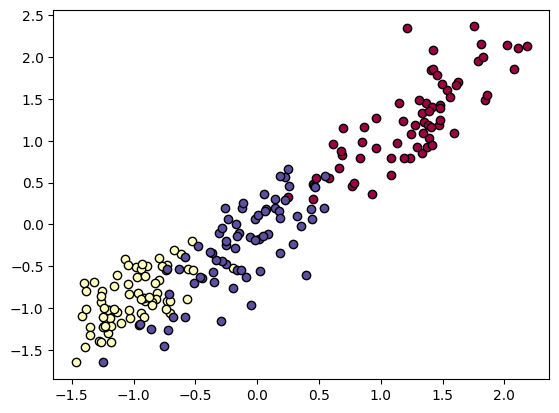

In [35]:
sp = SpectralClustering(n_clusters=3,
                        affinity='rbf',
                        assign_labels='kmeans',
                        eigen_solver='arpack',
                        n_init=300).fit(X)
labels = sp.labels_

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)


    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 3], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.show()

In [38]:
data_raw = pd.read_excel('clustering datasets/set1.xlsx')
X = StandardScaler().fit_transform(data_raw)

In [ ]:
data_raw = pd.read_excel('drive/My Drive/clustering/set2.xlsx')
X = StandardScaler().fit_transform(data_raw)


In [ ]:
data_raw = pd.read_excel('drive/My Drive/clustering/set3.xlsx')
X = StandardScaler().fit_transform(data_raw)

In [ ]:
data_raw = pd.read_excel('drive/My Drive/clustering/set4.xlsx')
X = StandardScaler().fit_transform(data_raw)


In [60]:
datasets = [pd.read_excel(f"clustering datasets/set{i}.xlsx") for i in range(1,5)]

c:\Users\Danila\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


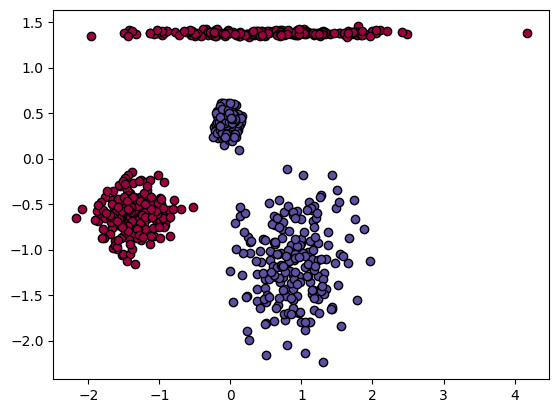

c:\Users\Danila\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


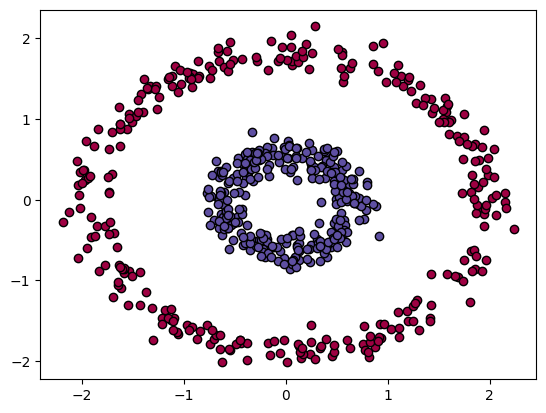

c:\Users\Danila\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


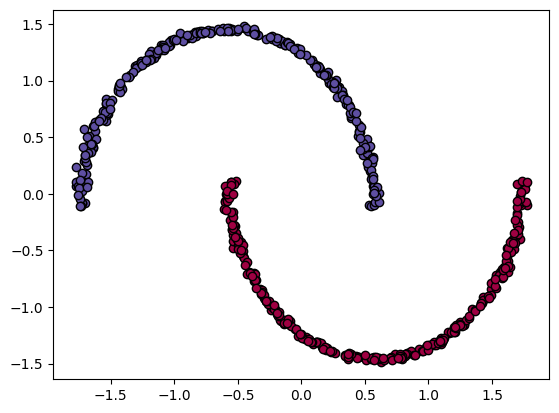

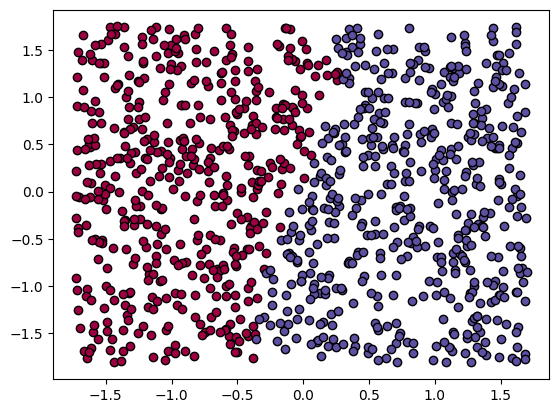

In [61]:
for data_raw in datasets:    
    X = StandardScaler().fit_transform(data_raw)
    sp = SpectralClustering(n_clusters=2,
                            affinity='nearest_neighbors',
                            n_neighbors=20,
                            assign_labels='kmeans',
                            eigen_solver='arpack',
                            n_init=10).fit(X)
    labels = sp.labels_
  

    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
            for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)


        xy = X[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                markeredgecolor='k', markersize=6)

    plt.show()